# Month 01 (Mini-project) Data Analysis

# University_Enrollment_Data_Analysis 

# Step 1: Load the Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load the dataset

In [2]:
file_path = 'university_enrollment_(Mini-project-01).csv'
data = pd.read_csv(file_path)
print("First few rows of the dataset:\n", data.head())

First few rows of the dataset:
    course_id course_type  year  enrollment_count pre_score  post_score  \
0          1   classroom  2018               165     28.14        73.0   
1          2   classroom  2020               175     79.68        86.0   
2          3      online  2016               257     57.24        80.0   
3          4      online  2013               251     97.67        75.0   
4          5   classroom  2019               165     39.75        76.0   

  pre_requirement   department  
0        Beginner      Science  
1             NaN      Science  
2             NaN  Mathematics  
3        Beginner   Technology  
4        Beginner      Science  


## Check the shape of the dataset

In [3]:
print("\nDataset shape:", data.shape)


Dataset shape: (1850, 8)


## Get basic information about the dataset

In [4]:
print("\nDataset information:")
print(data.info())


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1850 entries, 0 to 1849
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   course_id         1850 non-null   int64  
 1   course_type       1850 non-null   object 
 2   year              1850 non-null   int64  
 3   enrollment_count  1850 non-null   int64  
 4   pre_score         1850 non-null   object 
 5   post_score        1665 non-null   float64
 6   pre_requirement   959 non-null    object 
 7   department        1850 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 115.8+ KB
None


## Check for missing values

In [5]:
print("\nMissing values in the dataset:")
print(data.isnull().sum())


Missing values in the dataset:
course_id             0
course_type           0
year                  0
enrollment_count      0
pre_score             0
post_score          185
pre_requirement     891
department            0
dtype: int64


# Step 2: Data Cleaning - Handling Missing Values

In [6]:
data = data.dropna()
print("Missing values handled.\n", data.isnull().sum())
print("\nNo Missing Values Left. Data Cleaned.")

Missing values handled.
 course_id           0
course_type         0
year                0
enrollment_count    0
pre_score           0
post_score          0
pre_requirement     0
department          0
dtype: int64

No Missing Values Left. Data Cleaned.


# Step 3: Exploratory Data Analysis

## Identify Numeric and Categorical Columns

In [7]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = data.select_dtypes(include=['object']).columns
print("Numeric columns:", numeric_columns)
print("Categorical columns:", categorical_columns)

Numeric columns: Index(['course_id', 'year', 'enrollment_count', 'post_score'], dtype='object')
Categorical columns: Index(['course_type', 'pre_score', 'pre_requirement', 'department'], dtype='object')


## Analyze Numeric Columns

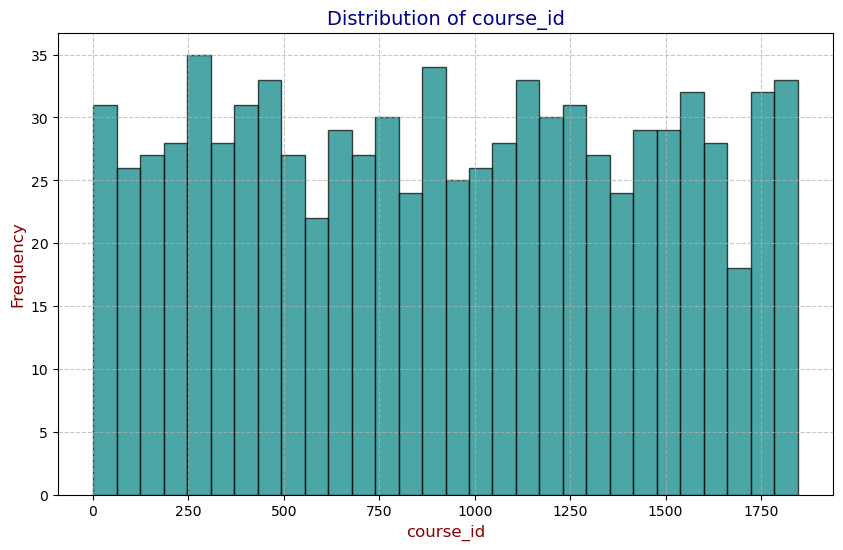

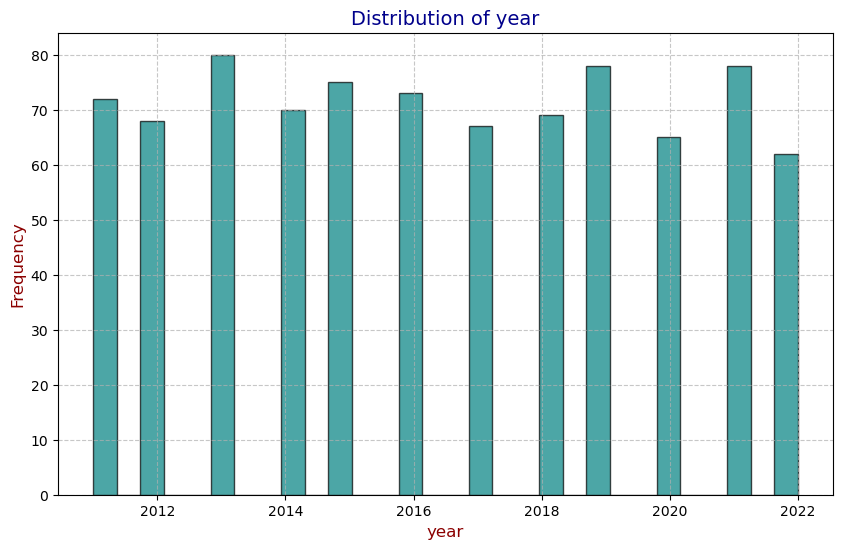

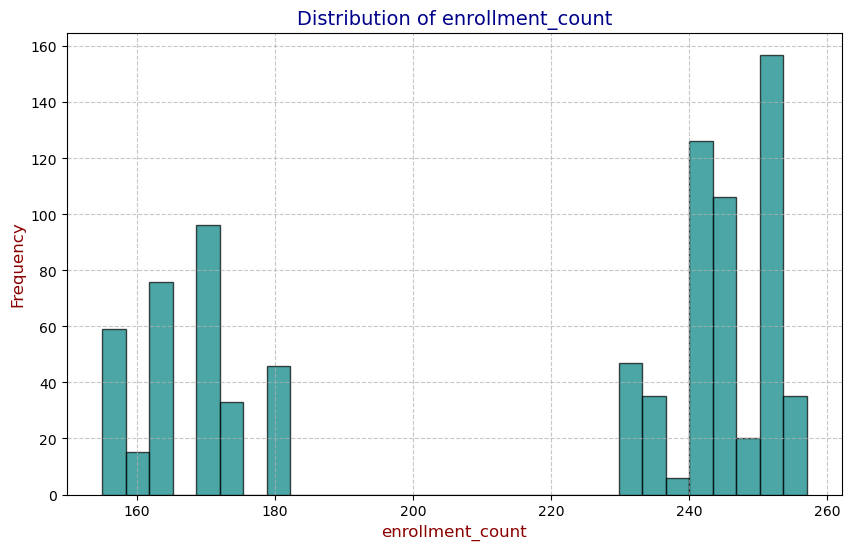

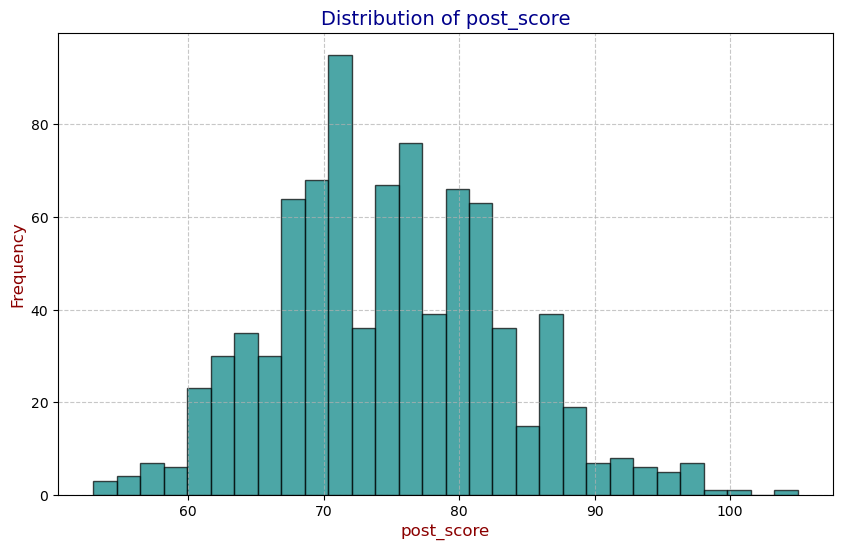

In [8]:
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    plt.hist(data[column], bins=30, color='teal', edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {column}', fontsize=14, color='darkblue')
    plt.xlabel(column, fontsize=12, color='darkred')
    plt.ylabel('Frequency', fontsize=12, color='darkred')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

## Analyze Categorical Columns

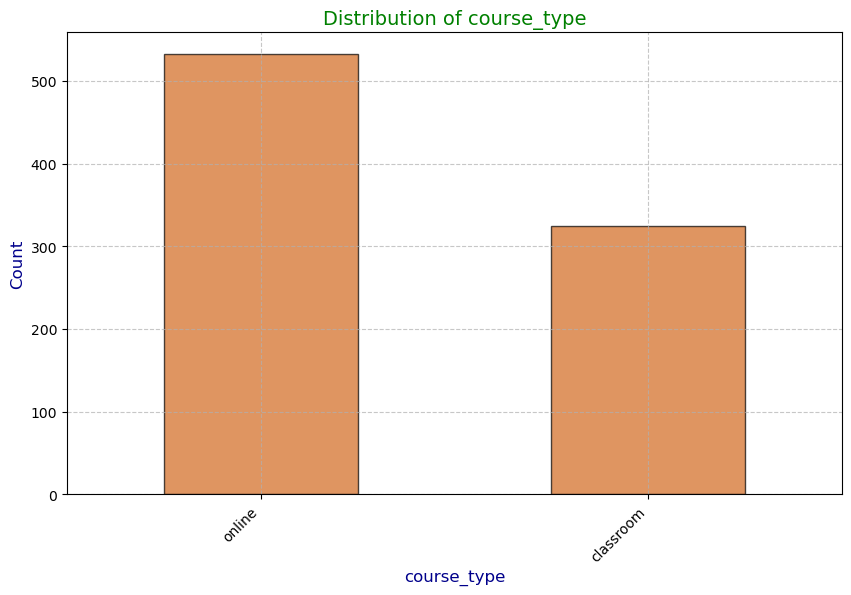

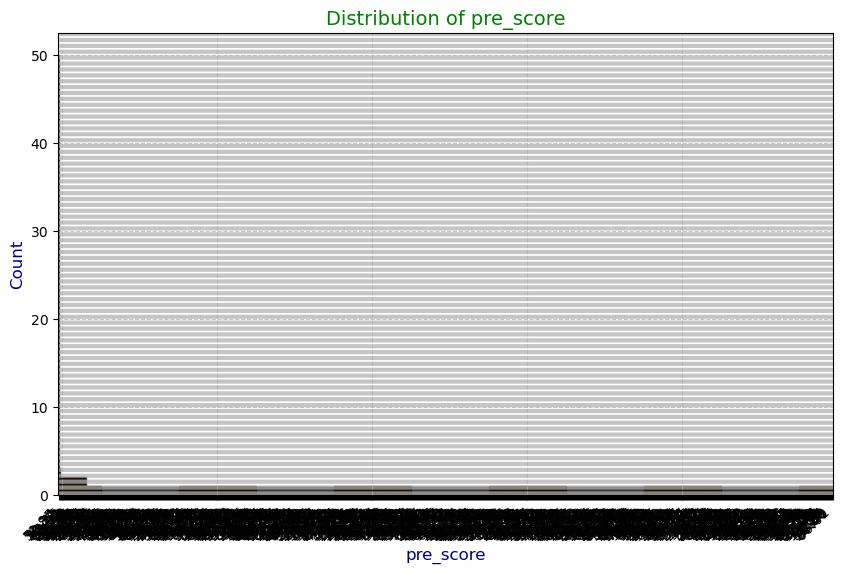

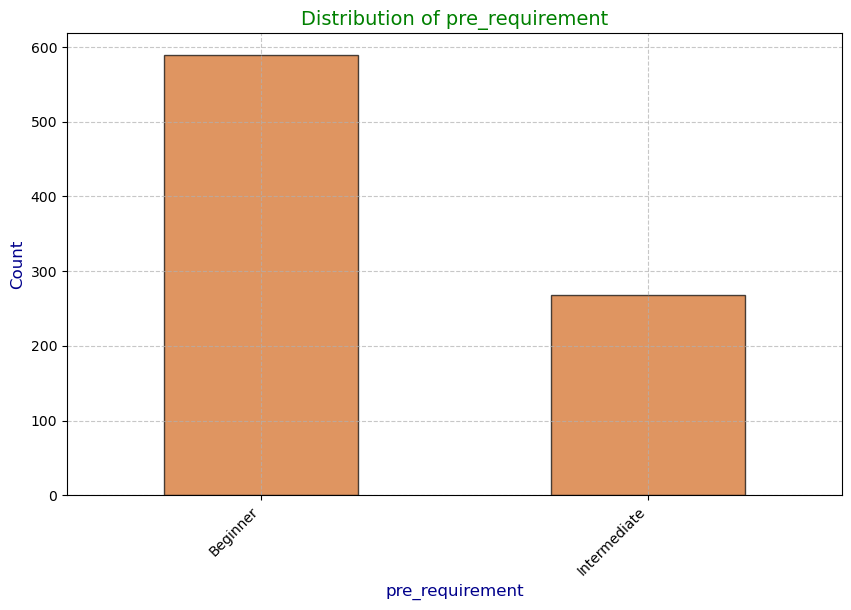

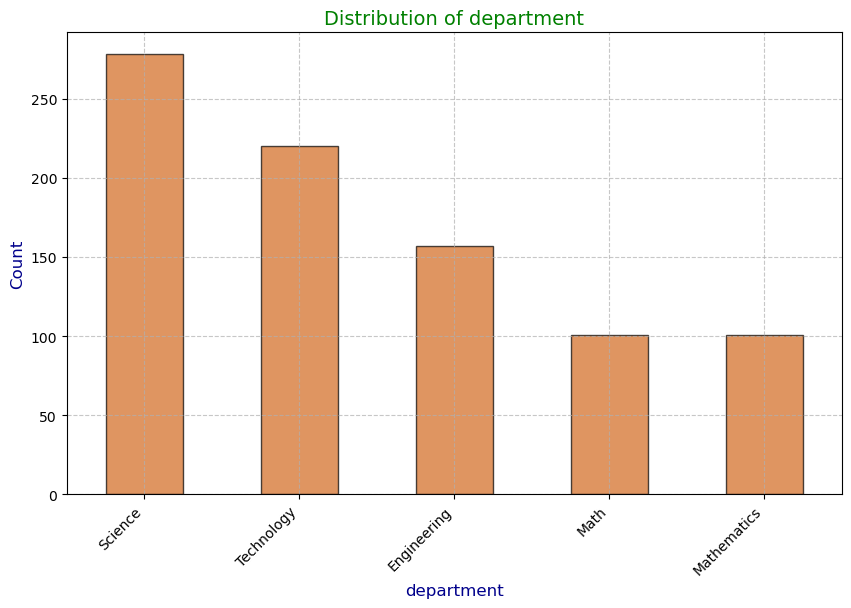

In [9]:
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    data[column].value_counts().plot(kind='bar', color='chocolate', edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {column}', fontsize=14, color='green')
    plt.xlabel(column, fontsize=12, color='darkblue')
    plt.ylabel('Count', fontsize=12, color='darkblue')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xticks(rotation=45, ha='right')
    plt.show()

## Correlation heatmap for numeric columns

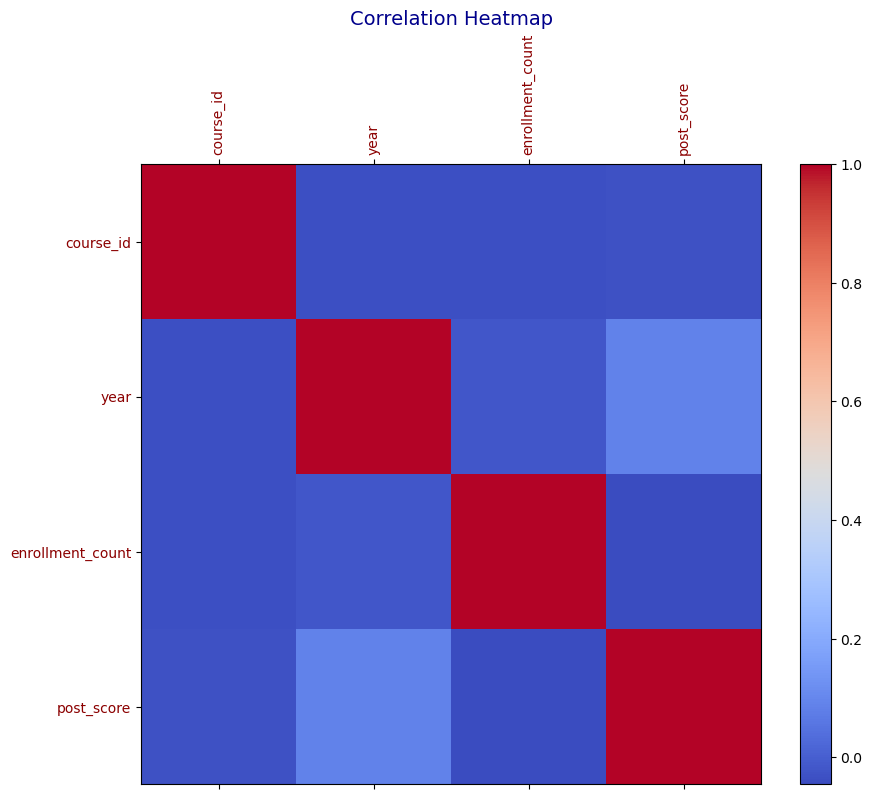

In [10]:
if len(numeric_columns) > 1:
    corr_matrix = data[numeric_columns].corr()
    plt.figure(figsize=(10, 8))
    plt.matshow(corr_matrix, fignum=1, cmap='coolwarm')
    plt.colorbar()
    plt.title('Correlation Heatmap', fontsize=14, color='darkblue')
    plt.xticks(ticks=np.arange(len(numeric_columns)), labels=numeric_columns, rotation=90, color='darkred')
    plt.yticks(ticks=np.arange(len(numeric_columns)), labels=numeric_columns, color='darkred')
    plt.show()

# Step 4: Comparative Analysis of Online vs Classroom Courses

In [11]:
if 'Course_Type' in categorical_columns:
    course_types = data['Course_Type'].unique()
    for column in numeric_columns:
        plt.figure(figsize=(12, 6))
        boxprops = dict(facecolor='skyblue', color='black', linewidth=1.5)
        medianprops = dict(color='red', linewidth=2)
        whiskerprops = dict(color='black', linewidth=1.5)
        capprops = dict(color='black', linewidth=1.5)
        flierprops = dict(marker='o', color='black', markersize=5)
        data.boxplot(column=column, by='Course_Type', grid=False, patch_artist=True,
                     boxprops=boxprops, medianprops=medianprops, whiskerprops=whiskerprops,
                     capprops=capprops, flierprops=flierprops)
        plt.title(f'{column} by Course Type', fontsize=14, color='darkblue')
        plt.suptitle('')
        plt.xlabel('Course Type', fontsize=12, color='darkblue')
        plt.ylabel(column, fontsize=12, color='darkblue')
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.show()

# Step 5: Statistical Analysis - Comparing Online and Classroom Courses

In [12]:
if 'Course_Type' in data.columns:
    statistical_summary = {}
    for column in numeric_columns:
        online_data = data[data['Course_Type'] == 'Online'][column].dropna()
        classroom_data = data[data['Course_Type'] == 'Classroom'][column].dropna()
        
        # Compute means and standard deviations
        online_mean = np.mean(online_data)
        classroom_mean = np.mean(classroom_data)
        online_std = np.std(online_data, ddof=1)
        classroom_std = np.std(classroom_data, ddof=1)
        
        # Compute t-statistic manually
        n_online = len(online_data)
        n_classroom = len(classroom_data)
        t_stat = (online_mean - classroom_mean) / np.sqrt((online_std**2 / n_online) + (classroom_std**2 / n_classroom))
        
        # Compute degrees of freedom
        df = ((online_std**2 / n_online) + (classroom_std**2 / n_classroom))**2 / (((online_std**2 / n_online)**2 / (n_online - 1)) + ((classroom_std**2 / n_classroom)**2 / (n_classroom - 1)))
        
        # Compute p-value from t-statistic
        p_value = 2 * (1 - stats.t.cdf(np.abs(t_stat), df))
        
        statistical_summary[column] = {'t-statistic': t_stat, 'p-value': p_value}
        print(f"Statistical Test for {column}:")
        print(f"Mean (Online): {online_mean}, Mean (Classroom): {classroom_mean}")
        print(f"t-statistic: {t_stat}, p-value: {p_value}")
        print(f"Significant difference: {'Yes' if p_value < 0.05 else 'No'}\n")

# Step 6: Summary of Findings

In [13]:
summary = {}
for column in numeric_columns:
    summary[f'{column}_total'] = data[column].sum()
    summary[f'{column}_average'] = data[column].mean()
    summary[f'{column}_min'] = data[column].min()
    summary[f'{column}_max'] = data[column].max()
    summary[f'{column}_std'] = data[column].std()

for column in categorical_columns:
    summary[f'{column}_unique_values'] = data[column].nunique()
    summary[f'{column}_most_common'] = data[column].mode()[0]

print("Summary of Statistics and Trends:")
for key, value in summary.items():
    print(f"{key}: {value}")

print("\nFrom the result of comparisons it is cleared that Online Courses contributes to Higher Enrollment.....")

Summary of Statistics and Trends:
course_id_total: 788453
course_id_average: 920.0151691948658
course_id_min: 1
course_id_max: 1846
course_id_std: 535.8209493131989
year_total: 1728086
year_average: 2016.436406067678
year_min: 2011
year_max: 2022
year_std: 3.42932381599005
enrollment_count_total: 184769
enrollment_count_average: 215.5997666277713
enrollment_count_min: 155
enrollment_count_max: 257
enrollment_count_std: 38.22650949253485
post_score_total: 64072.0
post_score_average: 74.76312718786464
post_score_min: 53.0
post_score_max: 105.0
post_score_std: 8.402193946015997
course_type_unique_values: 2
course_type_most_common: online
pre_score_unique_values: 780
pre_score_most_common: -
pre_requirement_unique_values: 2
pre_requirement_most_common: Beginner
department_unique_values: 5
department_most_common: Science

From the result of comparisons it is cleared that Online Courses contributes to Higher Enrollment.....


# Step 7: Relationship between Numeric and Categorical Variables

<Figure size 1200x600 with 0 Axes>

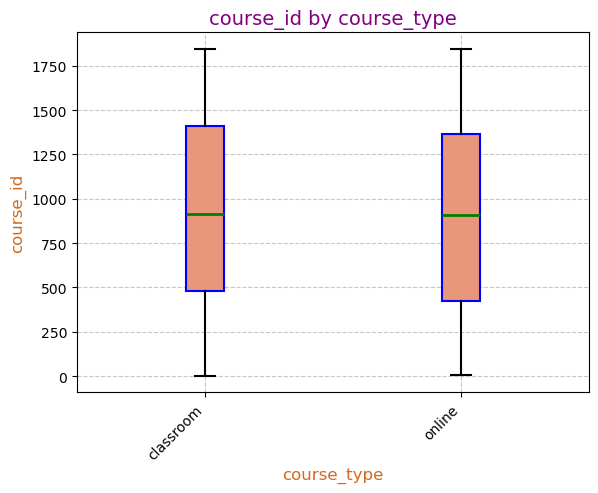

<Figure size 1200x600 with 0 Axes>

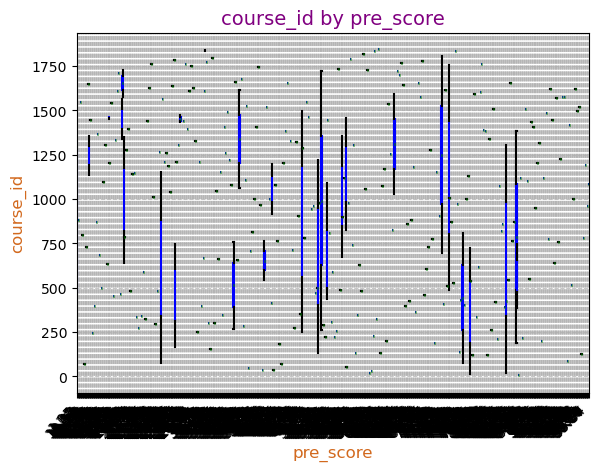

<Figure size 1200x600 with 0 Axes>

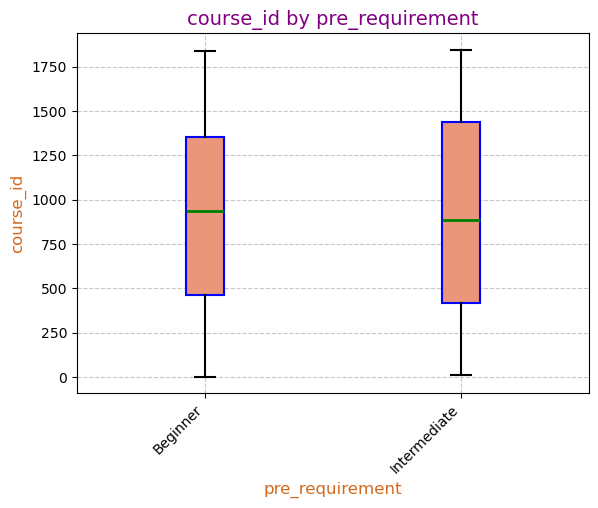

<Figure size 1200x600 with 0 Axes>

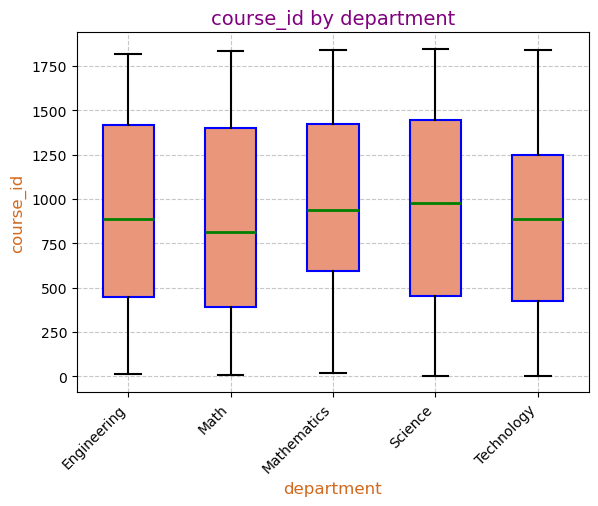

<Figure size 1200x600 with 0 Axes>

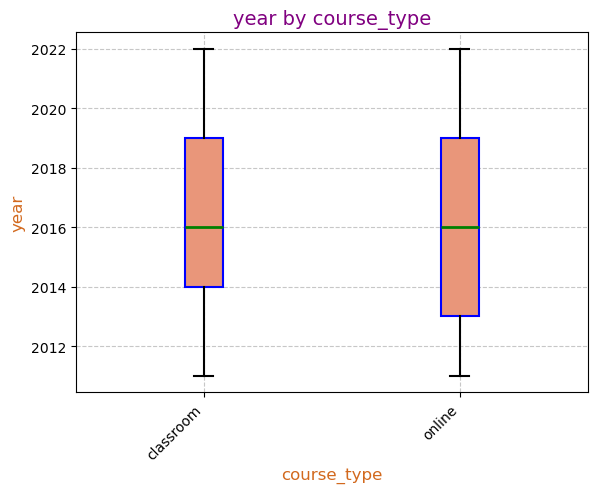

<Figure size 1200x600 with 0 Axes>

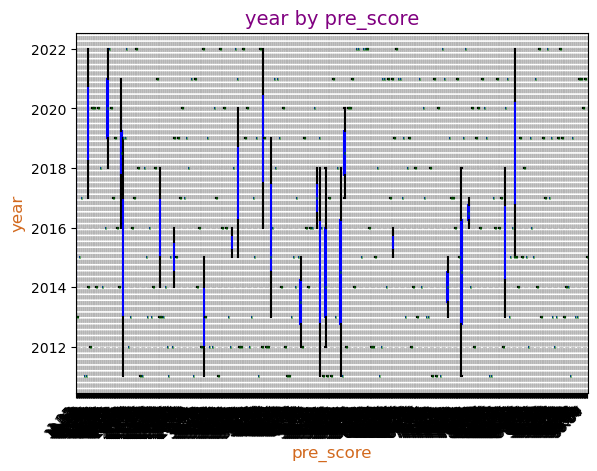

<Figure size 1200x600 with 0 Axes>

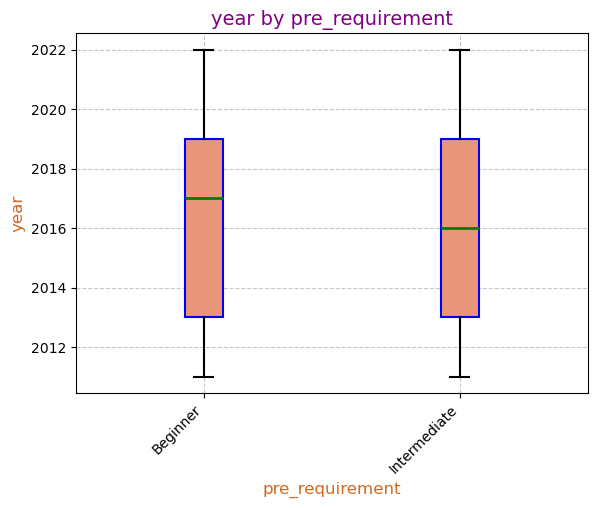

<Figure size 1200x600 with 0 Axes>

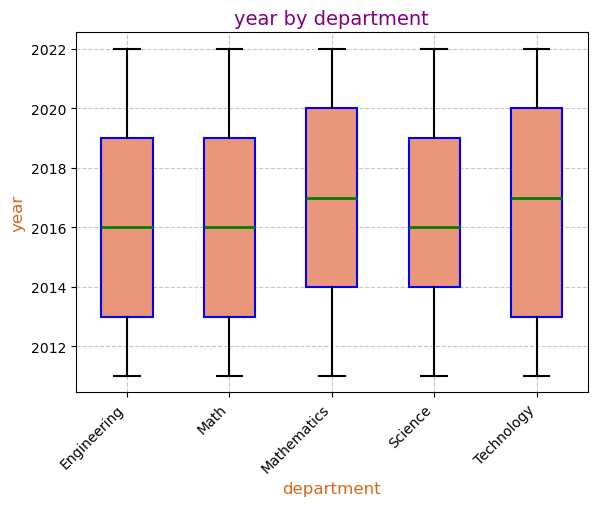

<Figure size 1200x600 with 0 Axes>

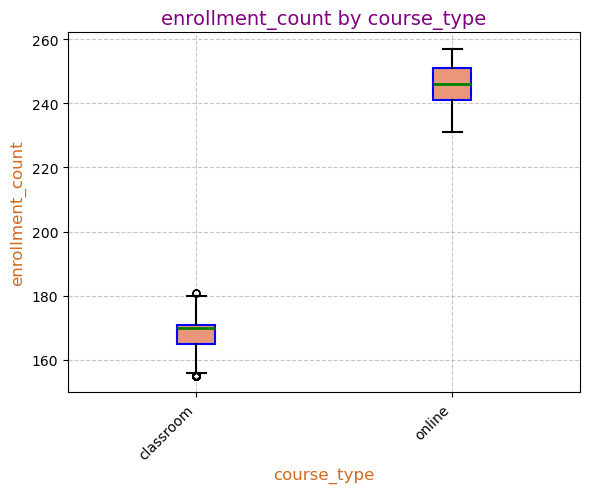

<Figure size 1200x600 with 0 Axes>

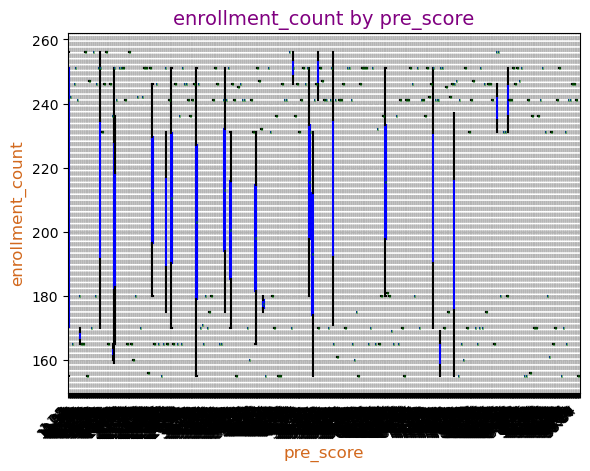

<Figure size 1200x600 with 0 Axes>

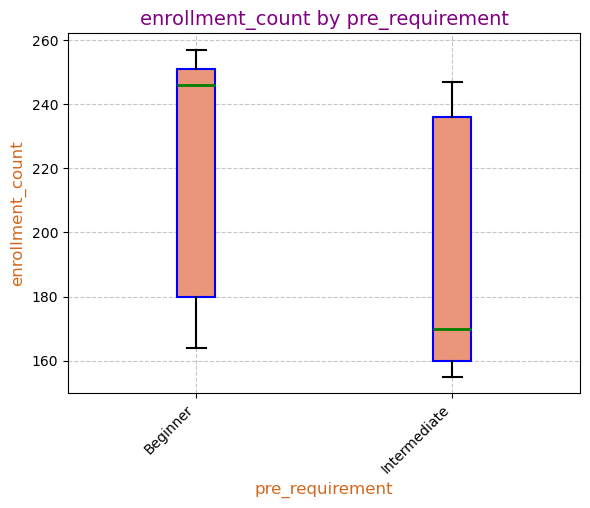

<Figure size 1200x600 with 0 Axes>

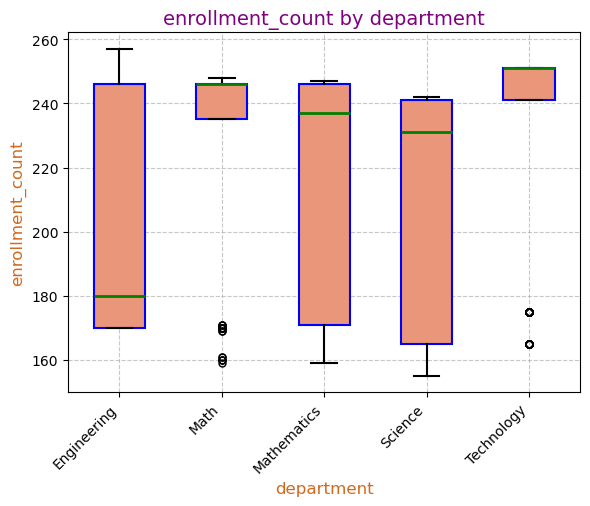

<Figure size 1200x600 with 0 Axes>

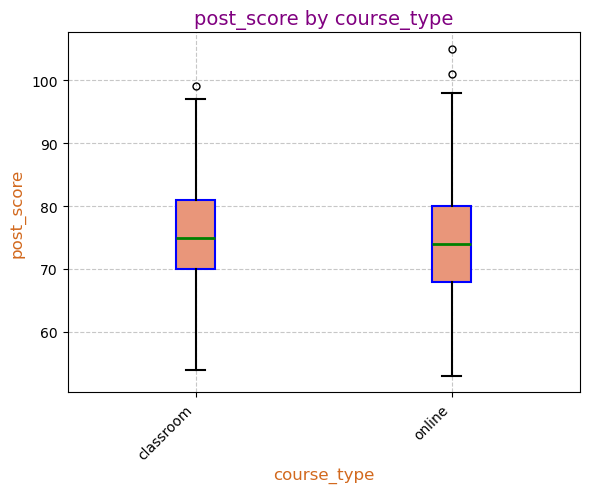

<Figure size 1200x600 with 0 Axes>

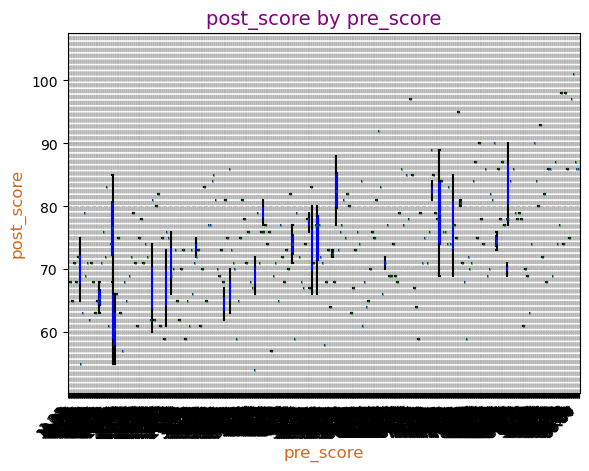

<Figure size 1200x600 with 0 Axes>

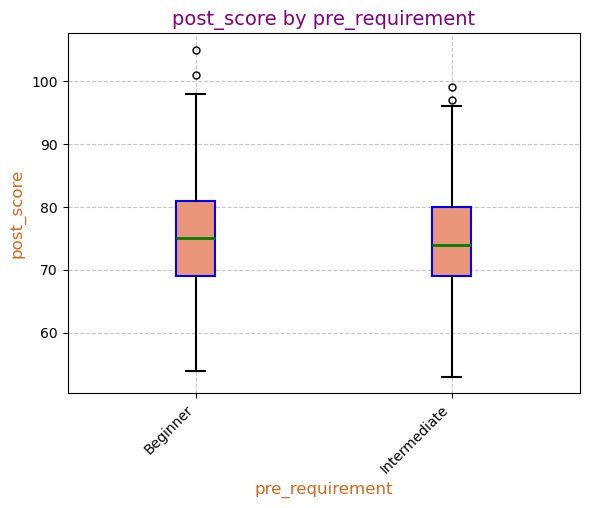

<Figure size 1200x600 with 0 Axes>

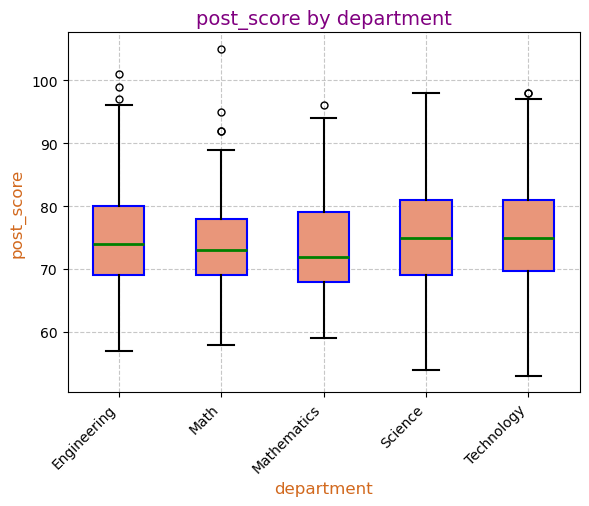

In [14]:
if len(numeric_columns) > 0 and len(categorical_columns) > 0:
    for num_col in numeric_columns:
        for cat_col in categorical_columns:
            plt.figure(figsize=(12, 6))
            boxprops = dict(facecolor='darksalmon', color='blue', linewidth=1.5)
            medianprops = dict(color='green', linewidth=2)
            whiskerprops = dict(color='black', linewidth=1.5)
            capprops = dict(color='black', linewidth=1.5)
            flierprops = dict(marker='o', color='black', markersize=5)
            data.boxplot(column=num_col, by=cat_col, grid=False, patch_artist=True,
                         boxprops=boxprops, medianprops=medianprops, whiskerprops=whiskerprops,
                         capprops=capprops, flierprops=flierprops)
            plt.title(f'{num_col} by {cat_col}', fontsize=14, color='purple')
            plt.suptitle('')
            plt.xlabel(cat_col, fontsize=12, color='chocolate')
            plt.ylabel(num_col, fontsize=12, color='chocolate')
            plt.xticks(rotation=45, ha='right')
            plt.grid(True, linestyle='--', alpha=0.7)
            plt.show()

# Conclusion

## Courses:

Total courses: 788,453 <br>
Average course ID: 920 (approx.)<br>
Course ID range: 1 - 1846<br>
Department offering the most courses: Science (based on most common value)<br>
Years:<br>

Total enrollment records: 1,728,086<br>
Average year: 2016 (approx.)<br>
Years with enrollment data: 2011 - 2022<br>

## Enrollment:<br>

Total enrollments: 184,769<br>
Average enrollment per course: 216 (approx.)<br>
Enrollment range per course: 155 - 257<br>

## Post Scores:<br>

Total post scores: 64,072<br>
Average post score: 74.76<br>
Post score range: 53.0 - 105.0<br>

## Course Types:<br>

Only two unique course types found (likely online and on-campus)<br>
Online courses are the most common<br>

## Pre Scores:<br>

780 unique pre scores exist<br>
No most common pre score provided (may indicate a large variety of scores)<br>

## Pre-Requisites:<br>

Only two unique pre-requisites found (likely Beginner and other)<br>
Beginner is the most common pre-requisite<br>